# Hands-on Environmental Sensing I - Datenanalyse
In diesem Notebook werden die gemessenen Daten des Low-Cost CO<sub>2</sub> Sensors analysiert, grafisch dargestellt und ausgewertet.<br>
Ein Beispieldatensatz über mehrere Tage ist im **data**-Ordner verfügbar.<br>

Gehe nun Schritt für Schritt durch das Notebook und führe das Notebook aus.

---
## Python Library Import
Der erste Schritt besteht darin, Python-Pakete zu importieren, die verwendet werden.<br>
Pandas ist zur Datenverarbeitung in Python unverzichtbar und wird zum Importieren, Manipulieren und Generieren von Daten verwendet.<br>
Zudem verwenden wir matplotlib zum Plotten der Daten.

In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

---
## Datenimport
Hier greifen wir auf die das file zu und laden alle verfügbaren Daten in eine Pandas Dataframe. Fehlerbehaftete Zeilen werden ignoriert und der datetyp der **timestamp** Spalte in das `datetime` Datenformat umgewandelt.

In [47]:
# load data from json file
filename = 'data/example_data.json'
data = []

with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
    for i, line in enumerate(f, 1):
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            continue

# Load into DataFrame
sensor_data = pd.DataFrame(data)

# Convert timestamp to datetime format and set it as index
sensor_data['time'] = pd.to_datetime(sensor_data['timestamp'], errors='coerce')

# Drop rows where conversion failed (NaT values) and timestamp column
sensor_data = sensor_data.drop(columns=['timestamp'])
sensor_data = sensor_data.dropna(subset=['time'])

# set datetime index and sort
sensor_data.set_index('time', inplace=True)
sensor_data = sensor_data.sort_index()

sensor_data.head()

,temperature [°C],humidity [%rH],co2 [ppm]
time,,,
2025-03-27 08:15:14+00:00,18.76011,41.43162,486
2025-03-27 08:15:16+00:00,18.87264,41.23268,486
2025-03-27 08:15:16+00:00,18.87264,41.23268,486
2025-03-27 08:15:18+00:00,18.92471,41.09955,486
2025-03-27 08:15:18+00:00,18.92471,41.09955,486


In [48]:
# print datatypes of the columns
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 475623 entries, 2025-03-27 08:15:14+00:00 to 2025-04-08 08:06:40+00:00
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temperature [°C]  475623 non-null  float64
 1   humidity [%rH]    475623 non-null  float64
 2   co2 [ppm]         475623 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 14.5 MB


---
## Grundlegende Informationen und Statistiken über die Daten  

Wir haben die Daten nun aus dem File importiert und können im Notebook damit arbeiten.  

Mit `df.head()` kannst du dir schnell die ersten Zeilen eines DataFrames anzeigen lassen, um einen ersten Überblick zu erhalten.<br>
Um eine schnelle Übersicht über wichtige Statistiken aus dem Datensatz zu erhalten kann `df.describe()` verwendet werden.

Zudem können wir auch nur auf ein subset (Reihen) der Daten mit den operatoren `.loc[]` oder `.iloc[]` zugreifen oder bestimmte Spalten mit `df[<columnname>]` auswählen.



In [49]:
# Statistiken aller Daten
sensor_data.describe()

,temperature [°C],humidity [%rH],co2 [ppm]
count,475623.000000,475623.000000,475623.000000
mean,12.175378,48.444495,446.210791
std,6.284828,18.684531,17.587864
min,1.497459,8.218479,403.000000
25%,8.452988,34.090610,432.000000
50%,10.300250,50.447650,447.000000
75%,14.427380,65.603350,458.000000
max,33.368680,78.606610,522.000000


In [50]:
print(f'Frühester Datenpunkt: {sensor_data.index.min()}')
print(f'Letzer Datenpunkt: {sensor_data.index.max()}')

Frühester Datenpunkt: 2025-03-27 08:15:14+00:00
Letzer Datenpunkt: 2025-04-08 08:06:40+00:00


# Resampling

Die Daten wurden mit einer hohen Datenrate erhoben und sollen nun in 1-min Mittelwerte umgerechnet werden. Hierzu bietet Pandas die Funktion `.resample()`, welche basierend auf einem timestamp-index Gruppen mit dem entsprechenden Zeitintervall bildet und eine Aggregator-FUnktion (z.B. `.sum()`, `.mean()`, `.min()`) anwendet. 

In [51]:
sensor_data = sensor_data.resample('1min').mean(numeric_only=True)
sensor_data.head()

,temperature [°C],humidity [%rH],co2 [ppm]
time,,,
2025-03-27 08:15:00+00:00,19.342445,39.800813,486.837209
2025-03-27 08:16:00+00:00,20.057800,37.877735,487.681818
2025-03-27 08:17:00+00:00,20.389518,36.701412,489.482759
2025-03-27 08:18:00+00:00,20.587478,36.212032,490.785714
2025-03-27 08:19:00+00:00,20.675205,35.984229,491.076923


---
## Plotting

Nun werden die erhobenen Daten grafisch dargestellt. Mit Hilfe der Funktion `plt.subplots()` werden drei Datenreihen in unterschiedlichen Grafen auf gemeinsamer X-Achse dargestellt. 

Text(0.5, 0, 'Zeit')

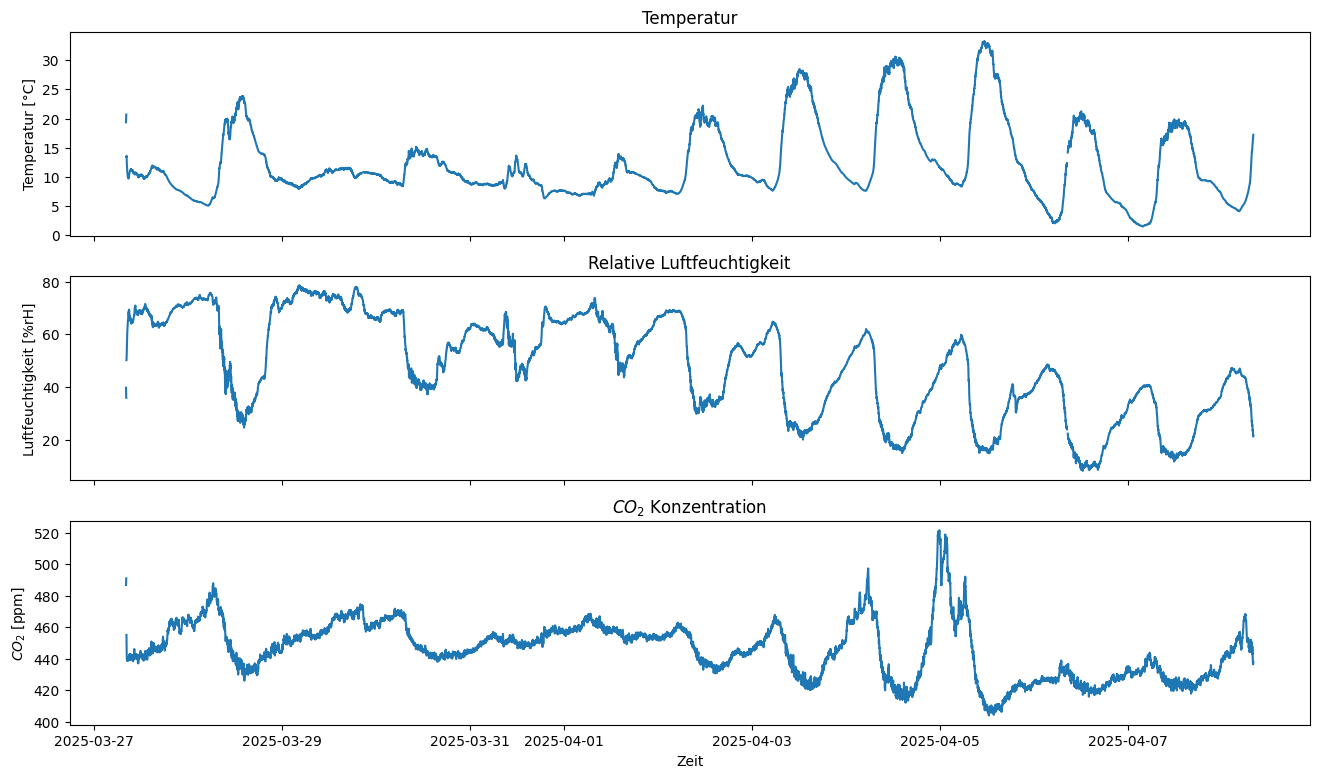

In [55]:
#value plot
fig, ax = plt.subplots(3, 1, figsize = (16,9), sharex = True)

ax[0].plot(sensor_data["temperature [°C]"])
ax[0].set_ylabel("Temperatur [°C]")
ax[0].set_title("Temperatur")

ax[1].plot(sensor_data["humidity [%rH]"])
ax[1].set_ylabel("Luftfeuchtigkeit [%rH]")
ax[1].set_title("Relative Luftfeuchtigkeit")

ax[2].plot(sensor_data["co2 [ppm]"])
ax[2].set_ylabel("$CO_2$ [ppm]")
ax[2].set_title("$CO_2$ Konzentration")
ax[2].set_xlabel("Zeit")
